In [114]:
# Importing Necessary Modules

import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

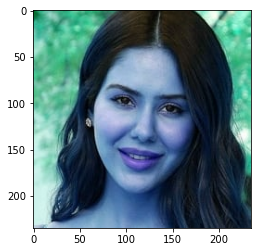

In [115]:
img=cv2.imread('C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\test\\1.jpg')
plt.imshow(img)
plt.show()

In [116]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(235, 235)

In [117]:
gray

array([[ 82,  88,  99, ..., 227, 217, 214],
       [ 77,  81,  90, ..., 221, 209, 204],
       [ 74,  76,  80, ..., 213, 199, 191],
       ...,
       [216, 215, 212, ...,  49,  50,  49],
       [215, 214, 210, ...,  50,  52,  54],
       [215, 212, 208, ...,  44,  46,  49]], dtype=uint8)

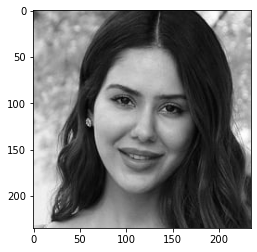

In [118]:
plt.imshow(gray,cmap='gray')
plt.show()

In [119]:
# Code For Importing Classifiers                            ---------------IMP--------
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

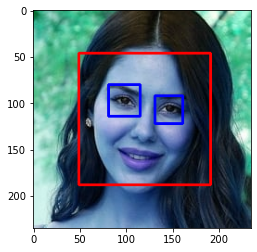

In [120]:
# Code To Detect Face & Eyes In An Image
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)                            # For Face Detection
    roi_gray=gray[y:y+h,x:x+w]                                                         #roi~ Region Of Intrest
    roi_color=face_img[y:y+h,x:x+h]
    eyes=eye_cascade.detectMultiScale(roi_gray)                                        #For Eyes Detection 
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

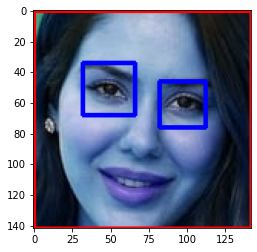

In [121]:
# Code To Show Face Only
%matplotlib inline
plt.imshow(roi_color,cmap='gray')
plt.show()

In [122]:
# Function to Get Cropped Image That Have Two Eyes
def required_img(img_path):
    img=cv2.imread(img_path)
    try:
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray,1.3,5)             # For Face Detection
    
        for (x,y,w,h) in faces:
            roi_gray=gray[y:y+h,x:x+w]
            roi_color=img[y:y+h,x:x+w]
        
            eyes=eye_cascade.detectMultiScale(roi_gray)            # for Eyes Detection
            if len(eyes)>=2:
                return roi_color
    except:
        pass

In [123]:
# Getting Cropped Image
cropped_image=required_img('C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\test\\1.jpg')
cropped_image

array([[[ 73, 178, 133],
        [ 73, 177, 130],
        [ 71, 173, 125],
        ...,
        [ 14,  22,  29],
        [ 12,  20,  27],
        [  8,  17,  26]],

       [[ 75, 179, 132],
        [ 75, 177, 129],
        [ 72, 172, 124],
        ...,
        [ 15,  23,  30],
        [ 13,  21,  28],
        [  8,  17,  26]],

       [[ 77, 182, 131],
        [ 68, 171, 120],
        [ 71, 172, 121],
        ...,
        [ 12,  19,  28],
        [ 12,  19,  28],
        [ 13,  20,  29]],

       ...,

       [[ 11,  25,  48],
        [ 18,  32,  54],
        [ 17,  31,  53],
        ...,
        [ 21,  36,  52],
        [ 12,  27,  43],
        [ 13,  23,  40]],

       [[ 12,  26,  49],
        [ 18,  30,  54],
        [ 16,  29,  51],
        ...,
        [ 20,  35,  51],
        [  9,  24,  40],
        [ 11,  22,  36]],

       [[ 12,  26,  49],
        [ 17,  29,  53],
        [ 13,  26,  48],
        ...,
        [ 21,  36,  52],
        [  7,  22,  38],
        [  8,  19,  33]]

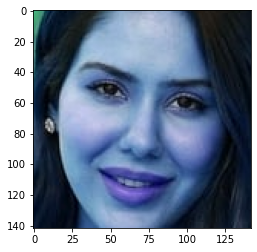

In [124]:
plt.imshow(cropped_image)
plt.show()

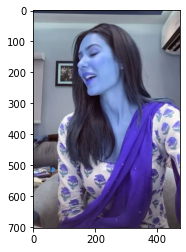

In [125]:
# Testing Function On Other Images
test=cv2.imread('C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\test\\3.jpg')
plt.imshow(test)
plt.show()

In [126]:
crop=required_img('C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\test\\3.jpg')
crop

In [127]:
# Setting Paths
path_to_data='C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\'
path_to_cr_data='C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\'

In [128]:
# Code To Store All Sub Directory Names in An List
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\neeru-bajwa',
 'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\ranjit-bawa',
 'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\sartaj',
 'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\sidhu-moose-wala',
 'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\sonam-bajwa',
 'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\tarsem-jassar']

In [129]:
# Code To Generate Cropped Folder If Already Exist Remove It & Generate New One
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [130]:
# Code To Travers Image Directories
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = required_img(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

neeru-bajwa
Generating cropped images in folder:  C:\Users\sandh\OneDrive\Desktop\Image_Classification\cropped\neeru-bajwa
ranjit-bawa
Generating cropped images in folder:  C:\Users\sandh\OneDrive\Desktop\Image_Classification\cropped\ranjit-bawa
sartaj
Generating cropped images in folder:  C:\Users\sandh\OneDrive\Desktop\Image_Classification\cropped\sartaj
sidhu-moose-wala
Generating cropped images in folder:  C:\Users\sandh\OneDrive\Desktop\Image_Classification\cropped\sidhu-moose-wala
sonam-bajwa
Generating cropped images in folder:  C:\Users\sandh\OneDrive\Desktop\Image_Classification\cropped\sonam-bajwa
tarsem-jassar
Generating cropped images in folder:  C:\Users\sandh\OneDrive\Desktop\Image_Classification\cropped\tarsem-jassar


In [133]:
# Code For Wavelet Transformation On Images
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

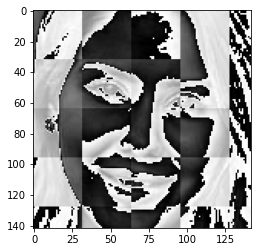

In [136]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')
plt.show()

# You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier
(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region
Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [138]:
celebrity_file_names_dict

{'neeru-bajwa': ['C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa1.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa2.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa3.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa4.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa5.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa6.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa7.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa8.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa9.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropp

In [139]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'neeru-bajwa': 0,
 'ranjit-bawa': 1,
 'sartaj': 2,
 'sidhu-moose-wala': 3,
 'sonam-bajwa': 4,
 'tarsem-jassar': 5}

# Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and Y now

In [141]:
X, Y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        try:
            img = cv2.imread(training_image)
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img,'db1',5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
            X.append(combined_img)
            Y.append(class_dict[celebrity_name])   
        except:
            pass

In [144]:
len(X)

319

In [148]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(319, 4096)

In [149]:
X[0]

array([ 19.,  21.,  21., ..., 252.,   0., 228.])

# Data cleaning process is done. Now we are ready to train our model
We will use SVM with rbf kernel tuned with heuristic finetuning

In [150]:
# Importing neccesary Modules
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.725

In [155]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.57      0.80      0.67         5
           2       1.00      0.20      0.33        10
           3       0.46      0.86      0.60         7
           4       0.92      0.57      0.71        21
           5       0.75      0.75      0.75         8

    accuracy                           0.73        80
   macro avg       0.74      0.69      0.65        80
weighted avg       0.79      0.72      0.70        80



# Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [156]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [157]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [159]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.728014,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.556383,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.732181,{'logisticregression__C': 1}


In [160]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [162]:
best_estimators['svm'].score(X_test,Y_test)

0.775

In [163]:
best_estimators['random_forest'].score(X_test,Y_test)

0.5875

In [164]:
best_estimators['logistic_regression'].score(X_test,Y_test)

0.825

In [166]:
best_clf = best_estimators['logistic_regression']

In [168]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, best_clf.predict(X_test))
cm

array([[27,  0,  0,  0,  2,  0],
       [ 0,  4,  0,  0,  0,  1],
       [ 0,  2,  6,  0,  0,  2],
       [ 0,  0,  0,  6,  0,  1],
       [ 4,  1,  0,  1, 15,  0],
       [ 0,  0,  0,  0,  0,  8]], dtype=int64)

Text(69.0, 0.5, 'Truth')

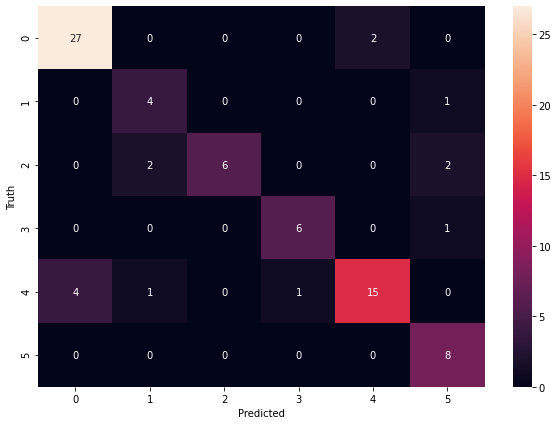

In [169]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [170]:
class_dict

{'neeru-bajwa': 0,
 'ranjit-bawa': 1,
 'sartaj': 2,
 'sidhu-moose-wala': 3,
 'sonam-bajwa': 4,
 'tarsem-jassar': 5}

# Saving Trained Model

In [171]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'image_classification.joblib') 

['image_classification.joblib']

# Save Class Dictonary

In [172]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))